# Data Challenge 2: Software Pricing Test

## Susan Currie Sivek

What price should Company XYZ set for Software X? We have recently run a test to measure the appeal of two prices to our website visitors. Our original price of \\$39 has been modified to \\$59 for a third of our website visitors in order to gauge the price's effects on our conversion rate.

### Key Takeaways:
- If total revenue is our current goal, consider increasing the software price to \\$59.
- Consider focusing ad spend on Google and Facebook, and encouraging user referrals to friends with promo codes and other methods.
- Consider shortening future tests of this type, depending on desired sensitivity.

## Data Cleaning

First I'll import the data and get it ready for analysis.

In [1]:
# import necessary tools

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
results = pd.read_csv("/Users/ssivek/Insight_Projects/data_c/19B/data_challenge_2/test_results.csv")
users = pd.read_csv("/Users/ssivek/Insight_Projects/data_c/19B/data_challenge_2/user_table.csv")

In [3]:
results.head()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0


In [4]:
users.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [5]:
print(results.shape)
print(users.shape) # what do the dataframes look like?

(316800, 9)
(275616, 5)


In [6]:
print(results['user_id'].nunique())
print(users['user_id'].nunique()) # do we have repeated users in either df? Nope.

316800
275616


In [7]:
# Do I have user geographic data on all the users in the results dataset? No.
pd.Series(list(set(users['user_id']).intersection(set(results['user_id'])))).count()

275616

In [8]:
# Time to merge these two datasets. I will do a full outer join to put them together, 
# which will fill in missing user data with NaN. I think I'm OK with that. Geography probably
# isn't critical here
df = pd.merge(results, users, on='user_id', how='outer')
df.head()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02


In [9]:
print(df['price'].nunique()) # the prices are not uniform -- 3,076 different values?!

3076


In [10]:
df['price'].mean() # wut

6457589.82988005

In [11]:
valid_prices = [39.0, 59.0]
df.loc[~df['price'].isin(valid_prices)] # 3074 rows with other than valid prices

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
94,94,713483,2015-05-01 22:14:32,direct_traffic,web,mac,0,760350245.0,0,Cleveland,USA,41.48,-81.68
163,163,813855,2015-03-13 19:52:42,ads-bing,mobile,android,1,880279005.0,0,NaN,NaN,NaN,NaN
201,201,34593,2015-03-30 08:14:44,ads_other,web,windows,0,630429505.0,0,Sacramento,USA,38.57,-121.47
271,271,878231,2015-03-20 01:08:07,ads-bing,mobile,iOS,0,991021920.0,0,Houston,USA,29.77,-95.39
289,289,951988,2015-05-02 13:20:25,ads_facebook,web,windows,0,532089148.0,0,Jacksonville,USA,30.33,-81.66
403,403,839013,2015-03-06 10:52:08,ads_facebook,mobile,iOS,1,586982279.0,1,Eldersburg,USA,39.41,-76.94
425,425,589975,2015-04-26 08:54:42,ads_facebook,mobile,iOS,0,838114695.0,0,Rancho Cucamonga,USA,34.12,-117.57
517,517,298770,2015-05-18 12:54:04,ads-bing,mobile,android,0,991024673.0,0,Winston-Salem,USA,36.10,-80.26
548,548,165419,2015-04-10 04:29:28,friend_referral,web,windows,0,731608106.0,0,Detroit,USA,42.38,-83.10
600,600,53480,2015-05-22 06:54:28,ads_facebook,web,windows,0,582513317.0,0,Kennewick,USA,46.20,-119.17


In [12]:
# can't imagine anyone pays 9+ figures for this software, so will convert to the two valid
# prices known to me based on the test column
df.loc[df['test'] == 0, ['price']] = 39.0 

In [13]:
df.loc[df['test'] == 1, ['price']] = 59.0

In [14]:
print(df['price'].nunique()) # OK, better -- just the two valid prices

2


In [15]:
df = df.drop(['Unnamed: 0'], axis=1) # delete unnecessary column

In [16]:
df.info() # check data types and missing values; some missing OS, timestamp, source entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316800 entries, 0 to 316799
Data columns (total 12 columns):
user_id             316800 non-null int64
timestamp           316466 non-null object
source              316488 non-null object
device              316800 non-null object
operative_system    296461 non-null object
test                316800 non-null int64
price               316800 non-null float64
converted           316800 non-null int64
city                275616 non-null object
country             275616 non-null object
lat                 275616 non-null float64
long                275616 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 31.4+ MB


In [17]:
# make sure strings are strings
df[['source', 'device', 'operative_system', 'city', 'country']] = df[['source', 'device', 'operative_system', 'city', 'country']].astype(str)

In [18]:
df['timestamp'] =  pd.to_datetime(df['timestamp'], errors = 'coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316800 entries, 0 to 316799
Data columns (total 12 columns):
user_id             316800 non-null int64
timestamp           305905 non-null datetime64[ns]
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null float64
converted           316800 non-null int64
city                316800 non-null object
country             316800 non-null object
lat                 275616 non-null float64
long                275616 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 31.4+ MB


In [21]:
df[['source', 'device', 'operative_system', 'city', 'country']] = df[['source', 'device', 'operative_system', 'city', 'country']].replace('nan', 'unknown')

In [22]:
work = df # make copy of df in order to revert if needed

In [23]:
work.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02


In [125]:
work.converted.value_counts() # 0 = non-conversion, 1 = conversion

0    310992
1      5808
Name: converted, dtype: int64

## Plots of Data

I'll take a look at the overall data and look for insights that might affect our conversion rate.

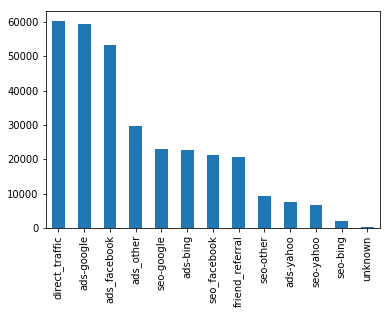

In [24]:
work.source.value_counts().plot(kind='bar')

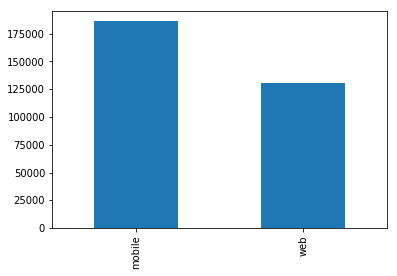

In [25]:
work.device.value_counts().plot(kind='bar')

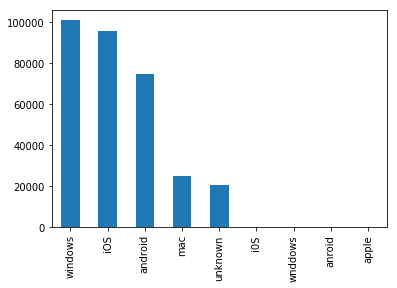

In [26]:
work.operative_system.value_counts().plot(kind='bar')

In [27]:
# some spelling errors in operative_system; correct those entries
work['operative_system'] = work['operative_system'].replace('i0S', 'iOS')
work['operative_system'] = work['operative_system'].replace('wnndows', 'windows')
work['operative_system'] = work['operative_system'].replace('apple', 'mac')
work['operative_system'] = work['operative_system'].replace('anroid', 'android')
work['operative_system'] = work['operative_system'].replace('wnddows', 'windows')

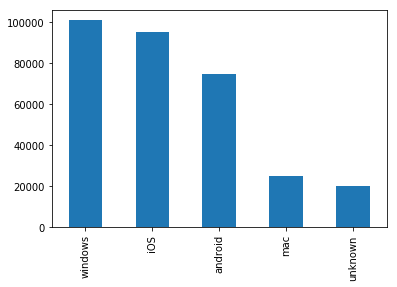

In [28]:
work.operative_system.value_counts().plot(kind='bar') # fixed the names

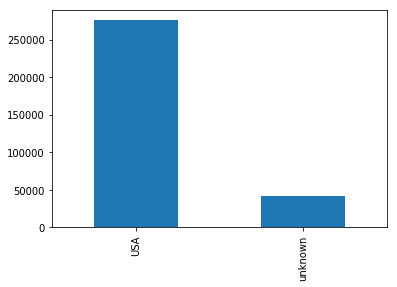

In [29]:
work.country.value_counts().plot(kind='bar') # all users with known country are in the U.S.

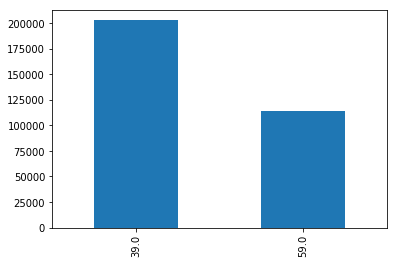

In [30]:
work.price.value_counts().plot(kind='bar') # price shown to users

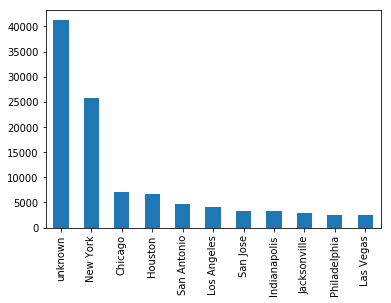

In [31]:
# top 10 cities of users; almost an exact match for the top cities by population in the U.S.
work.city.value_counts().sort_values(ascending=False)[:11].plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fde37f0>,
      dtype=object)

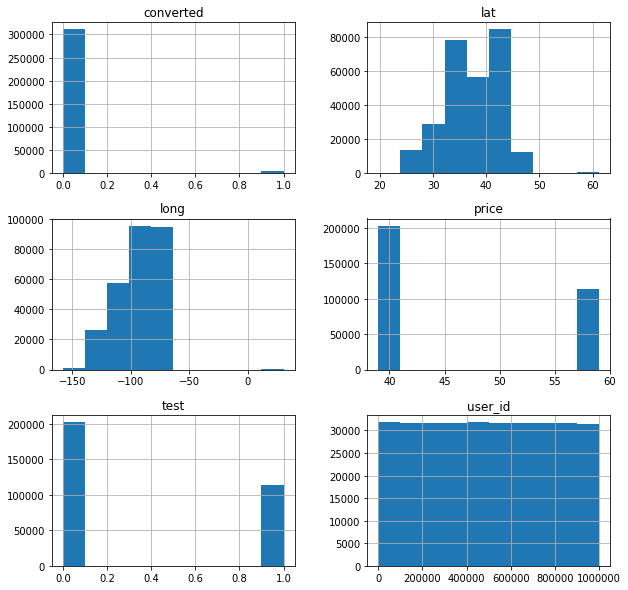

In [32]:
work.hist(figsize=(10,10)) # histograms for other features just to look for weirdness

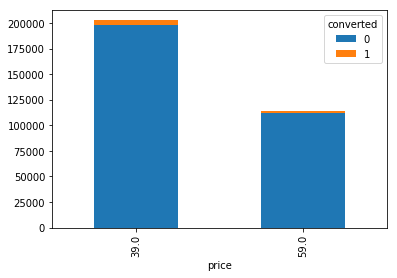

In [33]:
# stacked bar plot of conversions by price; doesn't appear hugely different
# keep on exploring all the features
bar = pd.DataFrame({'price':work.price,'converted':work.converted})
ct = pd.crosstab(work.price, work.converted)

ct.plot.bar(stacked=True)
plt.legend(title='converted')

plt.show()

In [34]:
work = work.drop(['user_id'], axis=1) # delete user id column

In [35]:
work.index = work['timestamp'] # make timestamp the index for easier exploration by time/date
del work['timestamp']
work.head()

,source,device,operative_system,test,price,converted,city,country,lat,long
timestamp,,,,,,,,,,
2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86
2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24
2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73
2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90
2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02


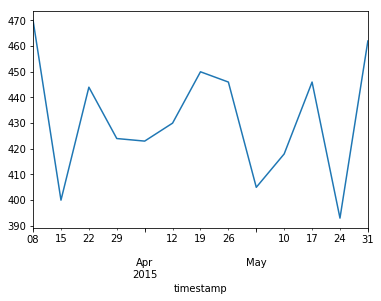

In [36]:
work.converted.resample('W').sum().plot() # conversions by week of tests
# hard to interpret without information on other company marketing at this time

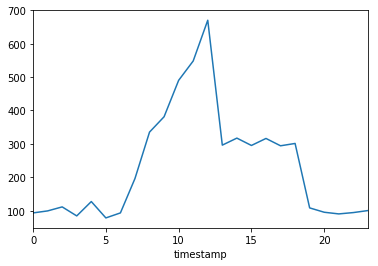

In [37]:
# plot of times of day for conversions by user local time
# this seems pretty normal - most activity in business hours, peaking around noon
work['converted'].groupby(work['converted'].index.hour).sum().plot()

# Regression 

Is price a significant factor in determining conversion? 

I want to know if price -- among the various features I have available -- is important in determining whether customers buy the software or not. The conversion is the target feature and is binary in nature. 

Though the target feature is imbalanced, with many more failures to convert than conversions, I will try logistic regression first to set a baseline for my model construction.

_Narrator: She would soon regret not trying to balance the data._

In [126]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [54]:
lr = work

In [55]:
# need to convert categorical features to one-hot encoding for regression 
# test and price will be perfectly correlated, so omitting price in favor of 0/1 test feature

# cat_columns = ['source', 'device', 'operative_system'] # categorical columns

le_source = LabelEncoder()
le_device = LabelEncoder()
le_os = LabelEncoder()
lr['source_encoded'] = le_source.fit_transform(lr.source)
lr['device_encoded'] = le_device.fit_transform(lr.device)
lr['os_encoded'] = le_os.fit_transform(lr.operative_system)

In [56]:
# one hot encoding of each of the three categorical variables
source_ohe = OneHotEncoder(categories='auto')
device_ohe = OneHotEncoder(categories='auto')
os_ohe = OneHotEncoder(categories='auto')
X_source = source_ohe.fit_transform(lr.source_encoded.values.reshape(-1,1)).toarray()
X_device = device_ohe.fit_transform(lr.device_encoded.values.reshape(-1,1)).toarray()
X_os = os_ohe.fit_transform(lr.os_encoded.values.reshape(-1,1)).toarray()

In [57]:
dfOneHot_S = pd.DataFrame(X_source, columns = ["Source_OHE"+str(int(i)) for i in range(X_source.shape[1])])
dfOneHot_D = pd.DataFrame(X_device, columns = ["Device_OHE"+str(int(i)) for i in range(X_device.shape[1])])
dfOneHot_OS = pd.DataFrame(X_os, columns = ["OS_OHE"+str(int(i)) for i in range(X_os.shape[1])])

In [58]:
print(dfOneHot_S.shape)
print(dfOneHot_D.shape)
print(dfOneHot_OS.shape)

(316800, 13)
(316800, 2)
(316800, 5)


In [61]:
# concat new one-hot arrays with original df
lr_OHE = pd.concat([lr.reset_index(drop=True), dfOneHot_S, dfOneHot_D, dfOneHot_OS], axis=1)

In [67]:
lr_OHE.head(20)

,source,device,operative_system,test,price,converted,city,country,lat,long,...,Source_OHE10,Source_OHE11,Source_OHE12,Device_OHE0,Device_OHE1,OS_OHE0,OS_OHE1,OS_OHE2,OS_OHE3,OS_OHE4
0,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,ads-google,mobile,iOS,0,39.0,0,New York,USA,40.67,-73.94,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,seo_facebook,web,windows,0,39.0,0,unknown,unknown,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,ads-bing,mobile,android,1,59.0,1,East Orange,USA,40.77,-74.21,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,ads_facebook,web,windows,1,59.0,0,Dayton,USA,39.78,-84.20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,ads_facebook,web,windows,1,59.0,0,Richmond,USA,37.53,-77.47,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [71]:
lr_OHE.columns

Index(['source', 'device', 'operative_system', 'test', 'price', 'converted',
       'city', 'country', 'lat', 'long', 'source_encoded', 'device_encoded',
       'os_encoded', 'Source_OHE0', 'Source_OHE1', 'Source_OHE2',
       'Source_OHE3', 'Source_OHE4', 'Source_OHE5', 'Source_OHE6',
       'Source_OHE7', 'Source_OHE8', 'Source_OHE9', 'Source_OHE10',
       'Source_OHE11', 'Source_OHE12', 'Device_OHE0', 'Device_OHE1', 'OS_OHE0',
       'OS_OHE1', 'OS_OHE2', 'OS_OHE3', 'OS_OHE4'],
      dtype='object')

In [74]:
# define features and target for model
features = ['test', 'Source_OHE0', 'Source_OHE1', 'Source_OHE2', 'Source_OHE3', 
               'Source_OHE4', 'Source_OHE5', 'Source_OHE6', 'Source_OHE7', 'Source_OHE8', 
               'Source_OHE9', 'Source_OHE10', 'Source_OHE11', 'Source_OHE12', 'Device_OHE0', 
               'Device_OHE1', 'OS_OHE0', 'OS_OHE1', 'OS_OHE2', 'OS_OHE3', 'OS_OHE4'] # features for model
X = lr_OHE[features]
y = lr_OHE.converted # target

In [75]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [129]:
# create logistic regression model
# increased max iterations to 120 due to failure to converge at 100
logreg = LogisticRegression(solver='lbfgs', max_iter=120)

logreg.fit(X_train, y_train) # train classifier

y_pred = logreg.predict(X_test) # generate predictions

In [130]:
def display_scores(logreg): # use k-fold cross-validation to assess model, 10 folds
        acc = cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()
        prec = cross_val_score(logreg, X, y, cv=5, scoring='precision').mean()
        rec = cross_val_score(logreg, X, y, cv=5, scoring='recall').mean()
        print("5-fold cross validation scores:")
        print("Mean accuracy {}".format(acc))
        print("Mean precision {}".format(prec))
        print("Mean recall {}".format(rec))

In [131]:
display_scores(logreg) 

/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ssivek/anaconda3/lib/python3.7/site-packa

5-fold cross validation scores:
Mean accuracy 0.9816666667626526
Mean precision 0.0
Mean recall 0.0


This model isn't working! It may say 98.1% accuracy, but it's never predicting conversions. The target feature is so imbalanced that non-conversion is pretty much the default choice. I am running out of time, so I'm going to skip to something that is supposed to work well out of the box on imbalanced data like this: XGBoost. 

## XGBoost

In [95]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
gb = lr_OHE

In [98]:
X = gb[features]
y = gb.converted # targetgb.head()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [101]:
# gradient boosting models require more tuning
# I have tinkered with the n_estimators, min_samples_split, and min_samples_leaf parameters here
gb_model = GradientBoostingClassifier(n_estimators=80, learning_rate=1.0, 
                                max_depth=5, random_state=0, min_samples_split=12, 
                                min_samples_leaf=15).fit(X_train, y_train) # fit model

y_pred = gb_model.predict(X_test) # make predictions

In [102]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) # get some important metrics

Accuracy: 0.9819286616161617
Precision: 0.0
Recall: 0.0


/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
display_scores(gb_model)

/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ssivek/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ssivek/anaconda3/lib/python3.7/site-packa

5-fold cross validation scores:
Mean accuracy 0.9816666667626526
Mean precision 0.0
Mean recall 0.0


Same problem as the logistic regression above.

## Bombing the Data Challenge?

So, this has been a bit of a disaster. I managed to get the data cleaned up and to get my features one-hot encoded for the categorical variables. My logistic regression and my XGBoost models are scoring very well for accuracy, but they are _never_ predicting positive outcomes, suggesting that the extreme imbalance in the target feature is skewing the model toward always choosing non-conversion.

Maybe I should've started off with an even more simple approach. Maybe some chi-squares and bar plots probably could've done the trick. I'm going back to simpler ways, from simpler times...

In [104]:
import scipy

In [105]:
cs = work

In [111]:
# crosstab and chi-square for user OS
os_df = pd.crosstab(index=cs['operative_system'],columns=cs['converted'])
os_chi = scipy.stats.chi2_contingency(os_df, correction=True, lambda_=None)
print(os_df)
print("The chi-square value is {} and the alpha is {}".format(os_chi[0], os_chi[1]))

converted             0     1
operative_system             
android           73816  1119
iOS               93334  2131
mac               24483   602
unknown           20095   244
windows           99264  1712
The chi-square value is 233.32427245434326 and the alpha is 2.5404737890097982e-49


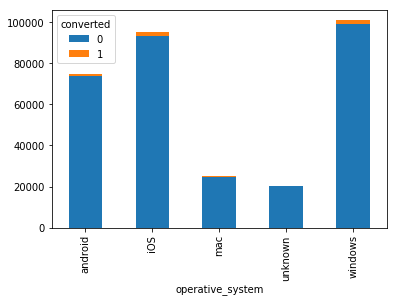

In [108]:
# stacked bar plot of conversions by OS; doesn't appear hugely different
bar = pd.DataFrame({'operative_system':cs.operative_system,'converted':cs.converted})
ct = pd.crosstab(cs.operative_system, cs.converted)

ct.plot.bar(stacked=True)
plt.legend(title='converted')

plt.show()

There's not a lot of useful information here. iOS and Windows users look slightly more likely to convert than Android, Mac, or unknown OS users.

In [112]:
# crosstab and chi-square for marketing channel (source)
source_df = pd.crosstab(index=cs['source'],columns=cs['converted'])
source_chi = scipy.stats.chi2_contingency(source_df, correction=True, lambda_=None)
print(source_df)
print("The chi-square value is {} and the alpha is {}".format(source_chi[0], source_chi[1]))

converted            0     1
source                      
ads-bing         22577   274
ads-google       58043  1276
ads-yahoo         7461   112
ads_facebook     52205  1132
ads_other        29420   429
direct_traffic   59564   743
friend_referral  19872   800
seo-bing          2098    51
seo-google       22766   394
seo-other         9105   145
seo-yahoo         6725   111
seo_facebook     20845   340
unknown            311     1
The chi-square value is 759.1457313464202 and the alpha is 9.476259759203061e-155


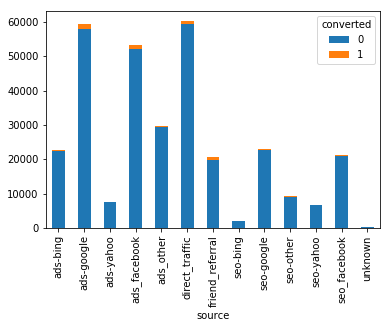

In [113]:
# stacked bar plot of conversions by marketing channel
bar = pd.DataFrame({'source':cs.source,'converted':cs.converted})
ct = pd.crosstab(cs.source, cs.converted)

ct.plot.bar(stacked=True)
plt.legend(title='converted')

plt.show()

This bar plot and crosstab reveal that Google ads and Facebook ads are performing well. Direct traffic and referrals from friends are also solid conversion generators. 

If I had more time, I would divide out the ads and the SEO data into separate features and examine them to see if any specific platform is significantly different in efficacy. I would also look more closely at the users who are being referred by friends and consider ways to further promote these referrals.

In [118]:
# crosstab and chi-square for user device (mobile/web)
device_df = pd.crosstab(index=cs['device'],columns=cs['converted'])
device_chi = scipy.stats.chi2_contingency(device_df, correction=True, lambda_=None)
print(device_df)
print("The chi-square value is {} and the alpha is {}".format(device_chi[0], device_chi[1]))

converted       0     1
device                 
mobile     183011  3460
web        127981  2348
The chi-square value is 1.2095681356078913 and the alpha is 0.27141766839639136


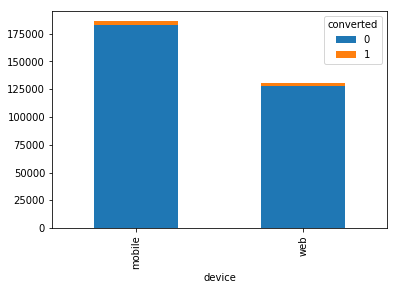

In [116]:
# stacked bar plot of conversions by user device (mobile/web)
bar = pd.DataFrame({'device':cs.device,'converted':cs.converted})
ct = pd.crosstab(cs.device, cs.converted)

ct.plot.bar(stacked=True)
plt.legend(title='converted')

plt.show()

There's no convincing evidence here that either mobile or web users are more likely to convert.

# But what about price?

In [119]:
# crosstab and chi-square for price and conversions; using test in lieu of price
price_df = pd.crosstab(index=cs['test'],columns=cs['converted']) 
price_chi = scipy.stats.chi2_contingency(price_df, correction=True, lambda_=None)
print(price_df)
print("The chi-square value is {} and the alpha is {}".format(price_chi[0], price_chi[1]))

converted       0     1
test                   
0          198692  4035
1          112300  1773
The chi-square value is 76.89494424182652 and the alpha is 1.8029808465845306e-18


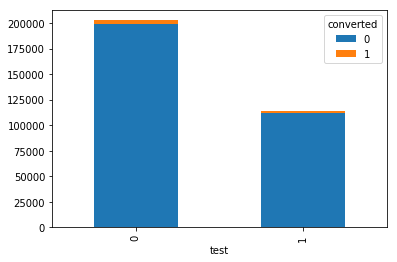

In [120]:
# stacked bar plot of conversions by test status (aka price)
bar = pd.DataFrame({'price':cs.test,'converted':cs.converted})
ct = pd.crosstab(cs.test, cs.converted)

ct.plot.bar(stacked=True)
plt.legend(title='converted')

plt.show()

Though the size difference between the orange blocks doesn't look very impressive on the bar plot above, there was in fact a statistically significant difference in conversions between the users who were shown a price of \\$39 versus those who were shown a price of \\$59. 


# Question 1 Response:
## If total revenue is more important than number of users, charge the higher price.

Those who received the lower price converted at a rate of about 2\%. Those who received the higher price converted at a rate of about 1.6\%.

The lower conversion rate isn't necessarily a bad thing, though.

However, this difference in conversion rate doesn't mean the price increase is a bad idea. Consider:
- If 120 users come to the site, receive the \\$39 price, and convert at a rate of 2\%, the revenue is about \\$94.
- If 120 users come to the site, receive the \\$59 price, and convert at a rate of 1.6\%, the revenue is about \\$114 -- \\$20 more than at the lower price point.

If total revenue is more important to this company than number of users, then the higher price may be a better idea!

Keep in mind, though, that referrals from friends was a potentially strong conversion generator. Further analysis of that user behavior might help determine which is a better strategy: increasing revenue from individual purchases or increasing the number of users.

# Question 2 Response:

## Other than the price distinction, the most important takeaways from the user data are:
- Google ads and Facebook ads are performing well in generating conversions for the software. Direct traffic and referrals from friends are also solid conversion generators. Consider focusing ad spend on Google and Facebook, and encouraging user referrals to friends with promo codes and other methods.
- User OS and mobile/web device usage don't seem to strongly correlate with conversion.
- All users with a known location were in the U.S., and were concentrated in major cities. If relevant to the product and goals, more detailed geographic analysis could be pursued using the lat/long data included here, time permitting.

# Question 3 Response:

## The test could have been shorter.
According to the [handy A/B test calculator](http://www.evanmiller.org/ab-testing/sample-size.html#!2;80;5;2;0) included in my Udacity A/B testing course, we would need 872 page views per variation to assess the pricing test (assuming a baseline conversion rate of 2\% on the $39 price and a minimum detectable effect of 2\% on that conversion rate. On average, the site sees about 3,361 users/viewers per day. A test of 1-2 days would potentially have been adequate to detect an effect on conversions of 2\% or more, at least in 8 of the 10 times such an effect were to exist.

In [147]:
int(work.device.resample('D').count().mean()) # average number of users per day

3361

## Recommendations and Next Steps

Please see above sections.

I am tired.

In [ ]:
# notes from later: couldn't use LR because one-hot encoding made those 
# variables perfectly dependent - should have used a method that drops one from
# the categories
# pd.get_dummies(df, drop_first=True) this might have been better